In [89]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import timeit.
import timeit
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [90]:
# Create a set of random latitude and longitude combinations.
place_count = 2000 
lats = np.random.uniform(low=-90.000, high=90.000, size=place_count)
lngs = np.random.uniform(low=-180.000, high=180.000, size=place_count)
coordinates = zip(lats, lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

752

In [77]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | azimur
City not found. Skipping...
Processing Record 3 of Set 1 | tashara
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | dranceni sat
City not found. Skipping...
Processing Record 9 of Set 1 | barsovo
Processing Record 10 of Set 1 | iquitos
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | poum
Processing Record 16 of Set 1 | cloquet
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | valenca do piaui
Processing Record 21 of Set 1 | tuktoyaktuk
Proce

In [91]:
# Convert the array of dictionaries to a Pandas DataFrame.
import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,85.78,38,1,17.38,AU,2023-02-19 08:26:39
1,Tashara,55.5195,83.5094,17.80,83,97,10.89,RU,2023-02-19 08:26:39
2,Castro,-24.7911,-50.0119,54.05,96,100,7.56,BR,2023-02-19 08:26:40
3,Portland,45.5234,-122.6762,45.18,88,40,4.61,US,2023-02-19 08:24:38
4,Tiksi,71.6872,128.8694,-25.71,98,63,7.74,RU,2023-02-19 08:26:40
5,Hofn,64.2539,-15.2082,36.41,98,100,4.54,IS,2023-02-19 08:26:41
6,Barsovo,61.1667,73.1667,10.53,90,100,3.91,RU,2023-02-19 08:26:41
7,Iquitos,-3.7481,-73.2472,77.04,94,75,1.14,PE,2023-02-19 08:26:42
8,Mataura,-46.1927,168.8643,59.49,95,100,1.34,NZ,2023-02-19 08:26:42
9,Punta Arenas,-53.1500,-70.9167,39.31,87,0,3.44,CL,2023-02-19 08:24:24


In [92]:
new_column_order = ["City", "Country", "Date",
                    "Lat","Lng","Max Temp",
                    "Humidity","Cloudiness","Wind Speed"]

In [93]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2023-02-19 08:26:39,-33.6500,115.3333,85.78,38,1,17.38
1,Tashara,RU,2023-02-19 08:26:39,55.5195,83.5094,17.80,83,97,10.89
2,Castro,BR,2023-02-19 08:26:40,-24.7911,-50.0119,54.05,96,100,7.56
3,Portland,US,2023-02-19 08:24:38,45.5234,-122.6762,45.18,88,40,4.61
4,Tiksi,RU,2023-02-19 08:26:40,71.6872,128.8694,-25.71,98,63,7.74
...,...,...,...,...,...,...,...,...,...
662,Katsuura,JP,2023-02-19 08:46:23,35.1333,140.3000,61.52,73,86,23.09
663,Woodward,US,2023-02-19 08:46:24,36.4337,-99.3904,43.83,59,0,12.66
664,College,US,2023-02-19 08:46:25,64.8569,-147.8028,-2.90,81,75,0.00
665,Ambam,CM,2023-02-19 08:46:25,2.3833,11.2833,73.56,40,87,1.54


In [94]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [95]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [98]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'02/19/23'

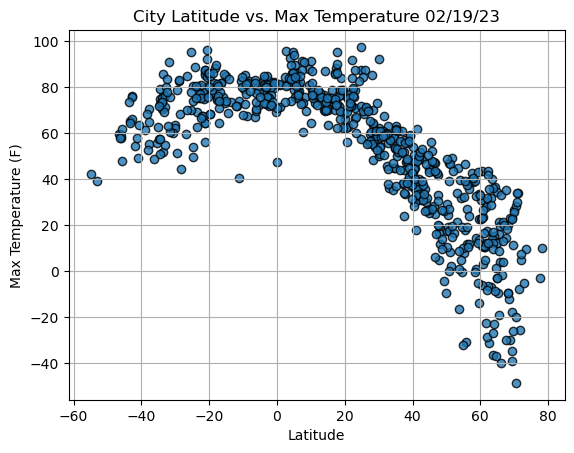

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

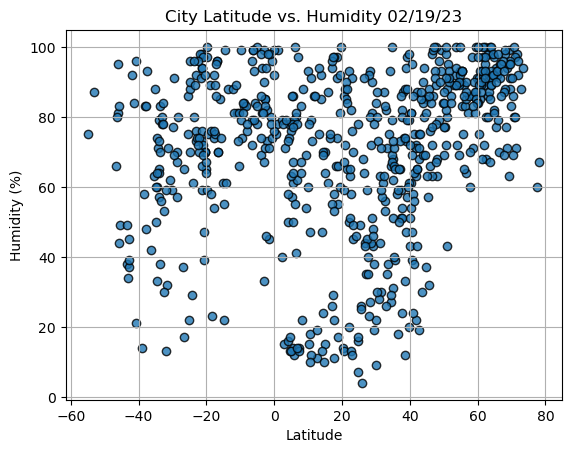

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

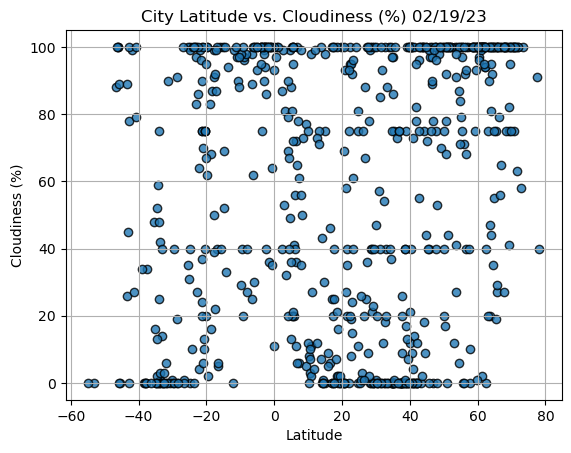

In [101]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

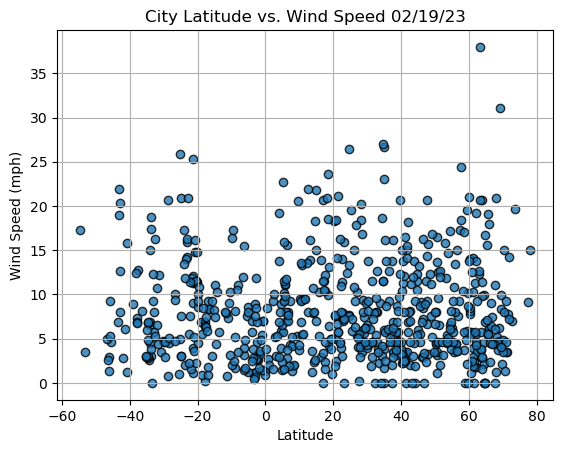

In [102]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [104]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tashara,RU,2023-02-19 08:26:39,55.5195,83.5094,17.80,83,97,10.89
3,Portland,US,2023-02-19 08:24:38,45.5234,-122.6762,45.18,88,40,4.61
4,Tiksi,RU,2023-02-19 08:26:40,71.6872,128.8694,-25.71,98,63,7.74
5,Hofn,IS,2023-02-19 08:26:41,64.2539,-15.2082,36.41,98,100,4.54
6,Barsovo,RU,2023-02-19 08:26:41,61.1667,73.1667,10.53,90,100,3.91
...,...,...,...,...,...,...,...,...,...
662,Katsuura,JP,2023-02-19 08:46:23,35.1333,140.3000,61.52,73,86,23.09
663,Woodward,US,2023-02-19 08:46:24,36.4337,-99.3904,43.83,59,0,12.66
664,College,US,2023-02-19 08:46:25,64.8569,-147.8028,-2.90,81,75,0.00
665,Ambam,CM,2023-02-19 08:46:25,2.3833,11.2833,73.56,40,87,1.54


In [106]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tashara,RU,2023-02-19 08:26:39,55.5195,83.5094,17.80,83,97,10.89
3,Portland,US,2023-02-19 08:24:38,45.5234,-122.6762,45.18,88,40,4.61
4,Tiksi,RU,2023-02-19 08:26:40,71.6872,128.8694,-25.71,98,63,7.74
5,Hofn,IS,2023-02-19 08:26:41,64.2539,-15.2082,36.41,98,100,4.54
6,Barsovo,RU,2023-02-19 08:26:41,61.1667,73.1667,10.53,90,100,3.91


In [107]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

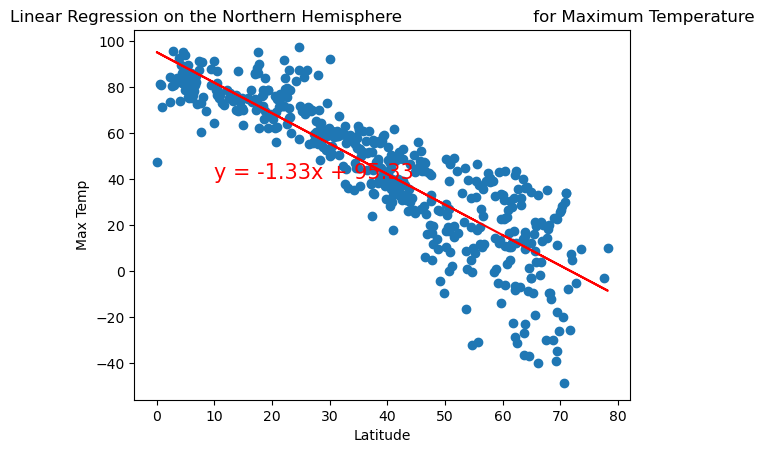

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

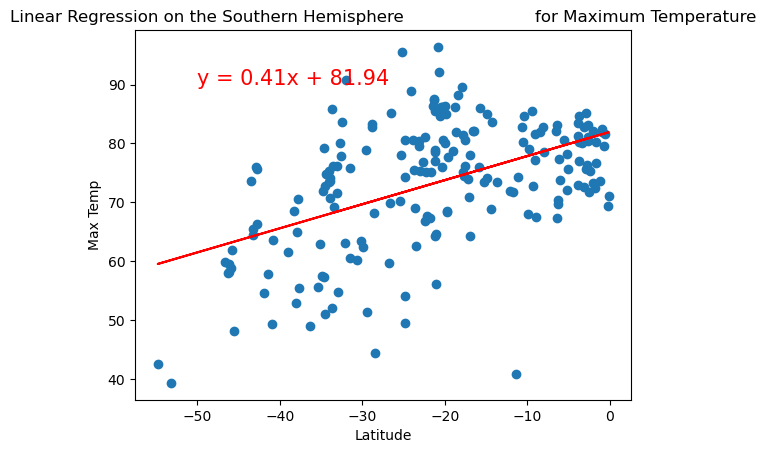

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

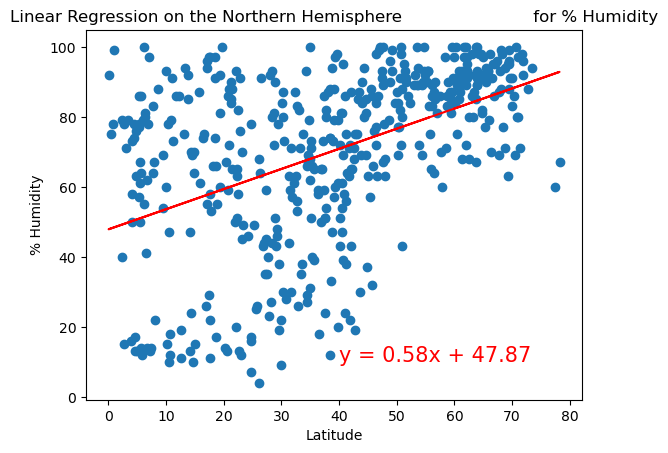

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

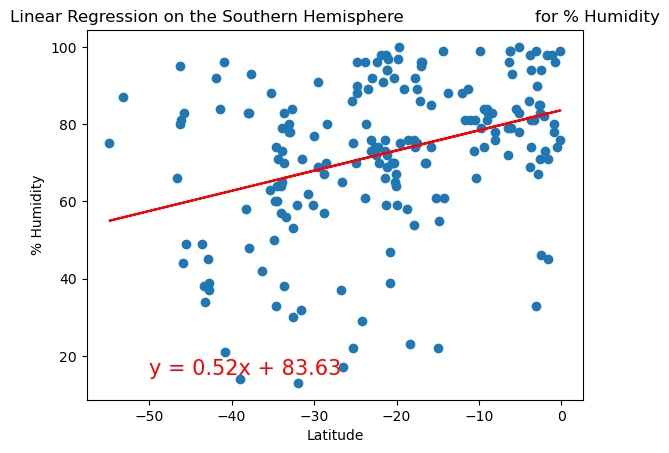

In [124]:
# Linear regression on the Southern Hemisphere
def LSRH():
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Humidity"]
    return x_values,y_values

x_values, y_values = LSRH()
# Call the function.
PLRS = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
                            
PLRS

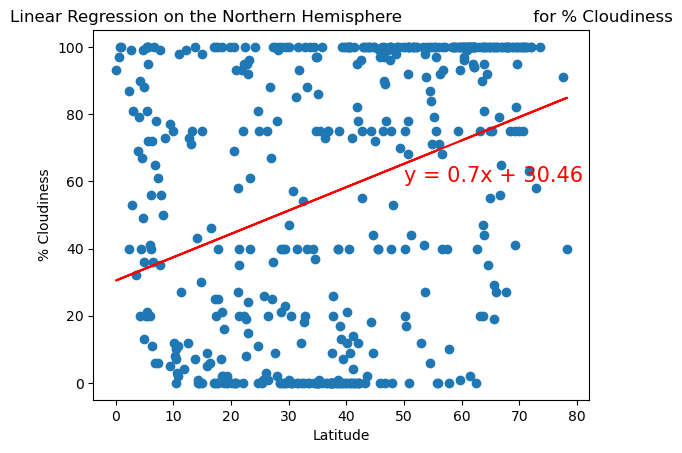

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

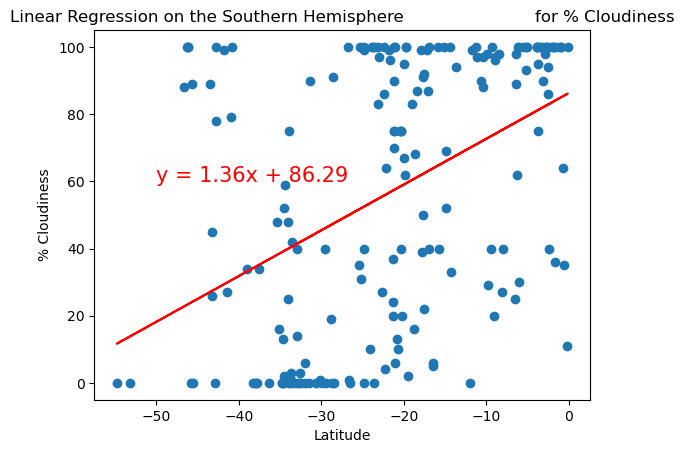

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

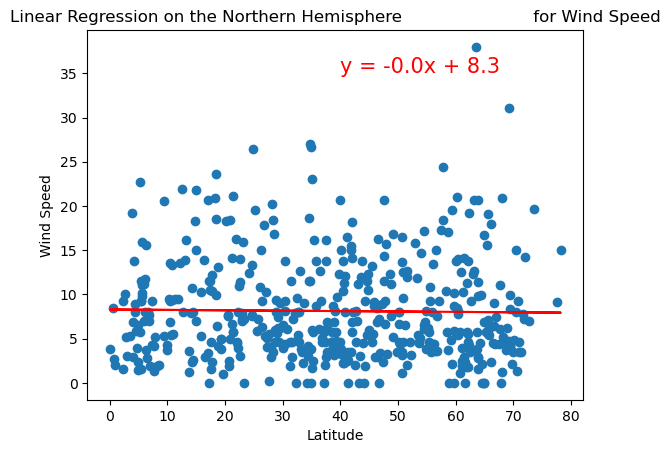

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

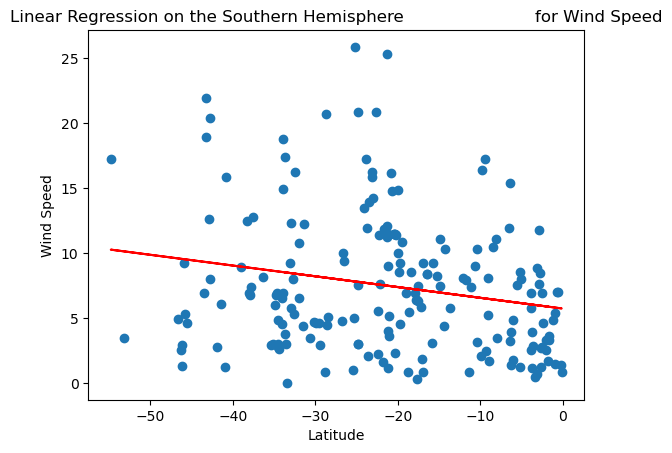

In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))